In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# Load dataset
filename = "./Data/ComputerHardware/machine.data"
names = "./Data/ComputerHardware/machine.names"
names = ["vendor name", "Model Name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
dataset = pd.read_csv(filename, names=names)

In [4]:
# We'll use only the numeric features for PCA
X = dataset[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
y = dataset["PRP"]  # Relative Performance

In [5]:
dataset

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [6]:
# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

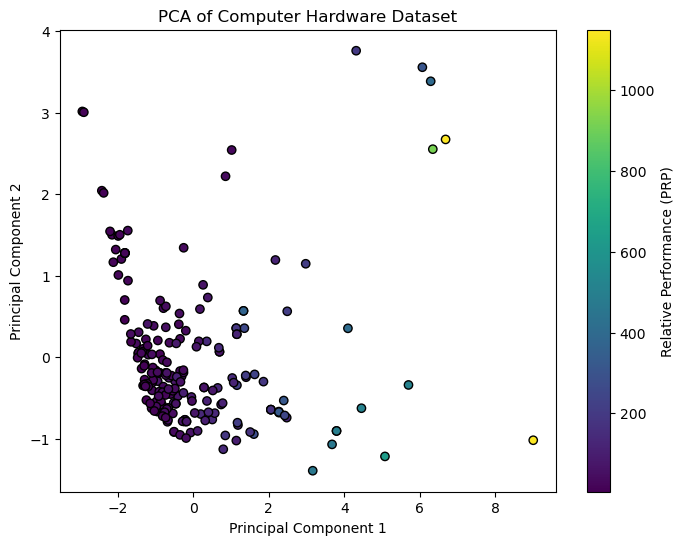

In [10]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Computer Hardware Dataset')
cbar = plt.colorbar(scatter)
cbar.set_label('Relative Performance (PRP)')
plt.show()

In [11]:
# Explained variance ratio
explained_var = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_var[0]:.2f}")
print(f"Explained variance by PC2: {explained_var[1]:.2f}")
print(f"Total explained variance: {explained_var.sum():.2f}")

Explained variance by PC1: 0.56
Explained variance by PC2: 0.14
Total explained variance: 0.70


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.2, random_state=42)

In [13]:
# Model on original features
reg_full = LinearRegression()
reg_full.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred_full = reg_full.predict(X_test)
r2_full = r2_score(y_test, y_pred_full)

In [15]:
# Model on PCA features
reg_pca = LinearRegression()
reg_pca.fit(X_pca_train, y_train)

LinearRegression()

In [16]:
y_pred_pca = reg_pca.predict(X_pca_test)
r2_pca = r2_score(y_test, y_pred_pca)

In [17]:
print(f"R2 score (original features): {r2_full:.3f}")
print(f"R2 score (PCA-reduced features): {r2_pca:.3f}")

R2 score (original features): 0.889
R2 score (PCA-reduced features): 0.786
